In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [38]:
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()

df = df.dropna(subset=['kmDriven'])
df['kmDriven'] = df['kmDriven'].str.replace('km', '').str.replace(',', '').astype(float)
df['AskPrice'] = df['AskPrice'].str.replace('₹', '').str.replace(',', '').astype(float)
df = df.drop(columns=['AdditionInfo'])
df['Transmission'] = label_encoder1.fit_transform(df['Transmission']).astype(float)
df['Owner'] = label_encoder2.fit_transform(df['Owner']).astype(float)
df['FuelType'] = label_encoder3.fit_transform(df['FuelType']).astype(float)
df['Age'] = df['Age'].astype(float)
df['kmDriven'] = df.groupby('Brand')['kmDriven'].transform(lambda x: x.fillna(x.median()))

df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,2001,23.0,98000.0,1.0,1.0,2.0,Nov-24,195000.0
1,Toyota,Innova,2009,15.0,190000.0,1.0,1.0,0.0,Jul-24,375000.0
2,Volkswagen,VentoTest,2010,14.0,77246.0,1.0,0.0,0.0,Nov-24,184999.0
3,Maruti Suzuki,Swift,2017,7.0,83500.0,1.0,1.0,0.0,Nov-24,565000.0
4,Maruti Suzuki,Baleno,2019,5.0,45000.0,0.0,0.0,2.0,Nov-24,685000.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   Year          9535 non-null   int64  
 3   Age           9535 non-null   float64
 4   kmDriven      9535 non-null   float64
 5   Transmission  9535 non-null   float64
 6   Owner         9535 non-null   float64
 7   FuelType      9535 non-null   float64
 8   PostedDate    9535 non-null   object 
 9   AskPrice      9535 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 819.4+ KB


In [41]:
df.describe()

,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
count,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000,9535.000000,9.535000e+03
mean,2016.375669,7.624331,70605.891453,0.500682,0.498374,0.997273,1.067161e+06
std,4.071090,4.071090,56308.596299,0.500026,0.500024,0.894587,1.661675e+06
min,1986.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04
25%,2014.000000,5.000000,43000.000000,0.000000,0.000000,0.000000,3.650000e+05
50%,2017.000000,7.000000,65000.000000,1.000000,0.000000,1.000000,5.999990e+05
75%,2019.000000,10.000000,86000.000000,1.000000,1.000000,2.000000,1.140000e+06
max,2024.000000,38.000000,980002.000000,1.000000,1.000000,2.000000,4.250000e+07


In [42]:
month_map = {
    'Jan': 1.0, 'Feb': 2.0, 'Mar': 3.0, 'Apr': 4.0, 'May': 5.0, 'Jun': 6.0,
    'Jul': 7.0, 'Aug': 8.0, 'Sep': 9.0, 'Oct': 10.0, 'Nov': 11.0, 'Dec': 12.0
}
df['PostedDate'] = df['PostedDate'].str[:3].map(month_map)
df['Year'] = df['Year'].astype(float)
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,2001.0,23.0,98000.0,1.0,1.0,2.0,11.0,195000.0
1,Toyota,Innova,2009.0,15.0,190000.0,1.0,1.0,0.0,7.0,375000.0
2,Volkswagen,VentoTest,2010.0,14.0,77246.0,1.0,0.0,0.0,11.0,184999.0
3,Maruti Suzuki,Swift,2017.0,7.0,83500.0,1.0,1.0,0.0,11.0,565000.0
4,Maruti Suzuki,Baleno,2019.0,5.0,45000.0,0.0,0.0,2.0,11.0,685000.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   Year          9535 non-null   float64
 3   Age           9535 non-null   float64
 4   kmDriven      9535 non-null   float64
 5   Transmission  9535 non-null   float64
 6   Owner         9535 non-null   float64
 7   FuelType      9535 non-null   float64
 8   PostedDate    9535 non-null   float64
 9   AskPrice      9535 non-null   float64
dtypes: float64(8), object(2)
memory usage: 819.4+ KB


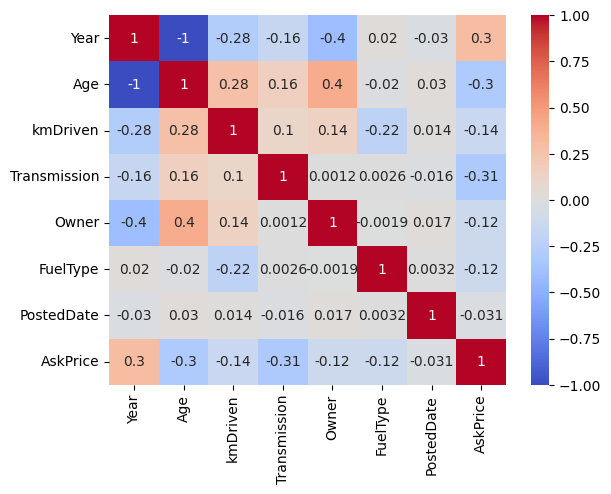

In [44]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [45]:
df = df.drop(columns=['Year'])

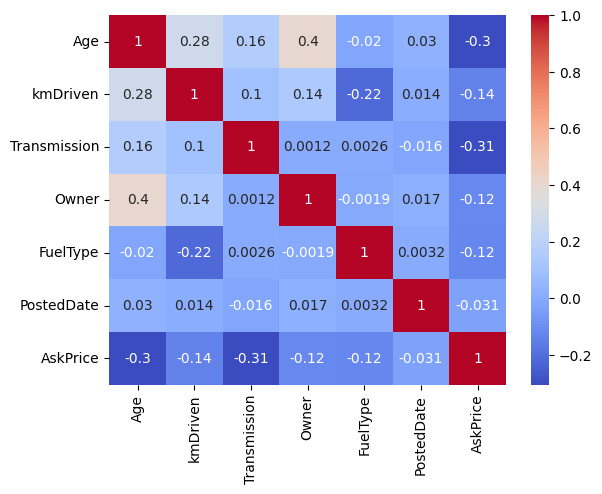

In [46]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

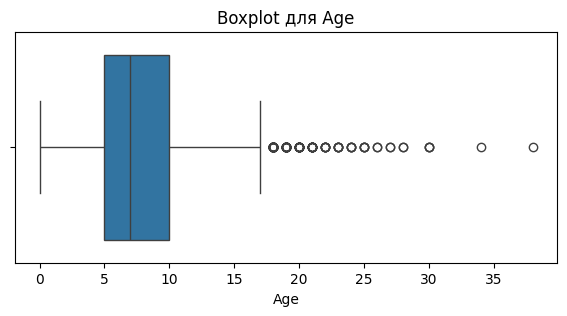

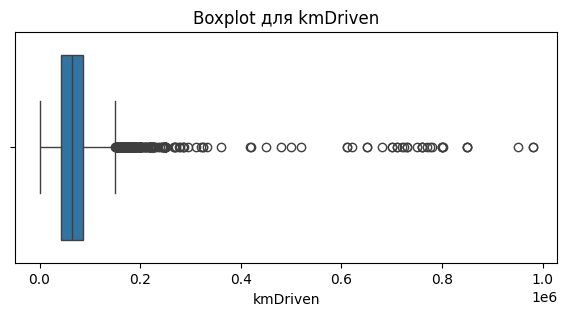

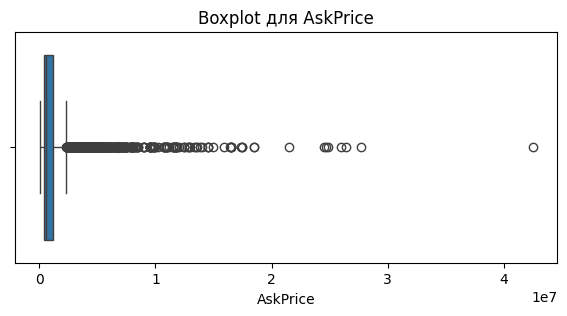

In [47]:
selected_columns = ['Age', 'kmDriven', 'AskPrice'] 
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

if not selected_columns:
    selected_columns = numeric_columns.columns

for column in selected_columns:
    if column in numeric_columns.columns:
        Q1 = numeric_columns[column].quantile(0.25)
        Q3 = numeric_columns[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (numeric_columns[column] < lower_bound) | (numeric_columns[column] > upper_bound)

        plt.figure(figsize=(7, 3))
        sns.boxplot(x=numeric_columns[column])
        plt.title(f"Boxplot для {column}")
        plt.show()
    else:
        print(f"Колонка {column} не найдена среди числовых данных.")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   Age           9535 non-null   float64
 3   kmDriven      9535 non-null   float64
 4   Transmission  9535 non-null   float64
 5   Owner         9535 non-null   float64
 6   FuelType      9535 non-null   float64
 7   PostedDate    9535 non-null   float64
 8   AskPrice      9535 non-null   float64
dtypes: float64(7), object(2)
memory usage: 744.9+ KB


In [49]:
for column in ['Age', 'kmDriven', 'AskPrice']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"Number of outliers in {column} before processing: {outliers.sum()}")

Number of outliers in Age before processing: 135
Number of outliers in kmDriven before processing: 353
Number of outliers in AskPrice before processing: 867


In [50]:
for column in ['Age', 'kmDriven', 'AskPrice']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound), median_value)

In [ ]:
import numpy as np

for column in ['Age', 'kmDriven']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"Number of outliers in {column} after processing: {outliers.sum()}")

df['AskPrice'] = np.log1p(df['AskPrice'])  
Q11 = df['AskPrice'].quantile(0.25)
Q33 = df['AskPrice'].quantile(0.75)
IQR1 = Q33 - Q11
lower_bound1 = Q11 - 1.5 * IQR1
upper_bound1 = Q33 + 1.5 * IQR1
outliers1 = (df['AskPrice'] < lower_bound1) | (df['AskPrice'] > upper_bound1)
print(f"Number of outliers in {column} after processing: {outliers.sum()}")

Number of outliers in Age after processing: 0
Number of outliers in kmDriven after processing: 115
Number of outliers in kmDriven after processing: 115


In [52]:
columns_to_check = ['kmDriven', 'AskPrice']

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

df = remove_outliers(df, columns_to_check)

print(f'Size of cleaned DataFrame: {df.shape}')

Size of cleaned DataFrame: (8771, 9)


In [53]:
df.head(10)

,Brand,model,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,7.0,98000.0,1.0,1.0,2.0,11.0,195000.0
1,Toyota,Innova,15.0,65000.0,1.0,1.0,0.0,7.0,375000.0
2,Volkswagen,VentoTest,14.0,77246.0,1.0,0.0,0.0,11.0,184999.0
3,Maruti Suzuki,Swift,7.0,83500.0,1.0,1.0,0.0,11.0,565000.0
4,Maruti Suzuki,Baleno,5.0,45000.0,0.0,0.0,2.0,11.0,685000.0
5,BMW,X3,10.0,83000.0,0.0,0.0,0.0,11.0,1350000.0
6,Toyota,Innova,10.0,65000.0,1.0,1.0,0.0,11.0,1025000.0
7,BMW,5 Series,5.0,25000.0,0.0,1.0,0.0,11.0,599999.0
8,Maruti Suzuki,maruti-suzuki-dzire,4.0,33759.0,1.0,1.0,2.0,11.0,622000.0
9,Ford,Ecosport,7.0,69713.0,1.0,1.0,2.0,11.0,649000.0


In [54]:
df.shape

(8771, 9)

In [55]:
df.head()

,Brand,model,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
0,Honda,City,7.0,98000.0,1.0,1.0,2.0,11.0,195000.0
1,Toyota,Innova,15.0,65000.0,1.0,1.0,0.0,7.0,375000.0
2,Volkswagen,VentoTest,14.0,77246.0,1.0,0.0,0.0,11.0,184999.0
3,Maruti Suzuki,Swift,7.0,83500.0,1.0,1.0,0.0,11.0,565000.0
4,Maruti Suzuki,Baleno,5.0,45000.0,0.0,0.0,2.0,11.0,685000.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8771 entries, 0 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8771 non-null   object 
 1   model         8771 non-null   object 
 2   Age           8771 non-null   float64
 3   kmDriven      8771 non-null   float64
 4   Transmission  8771 non-null   float64
 5   Owner         8771 non-null   float64
 6   FuelType      8771 non-null   float64
 7   PostedDate    8771 non-null   float64
 8   AskPrice      8771 non-null   float64
dtypes: float64(7), object(2)
memory usage: 685.2+ KB


In [57]:
df = pd.get_dummies(df, columns=['Brand', 'model'])

In [58]:
copied_df1 = df.copy(deep=True)
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
numerical_features1 = ['Age', 'kmDriven']
copied_df1[numerical_features1] = scaler1.fit_transform(copied_df1[numerical_features1])

In [59]:
copied_df2 = df.copy(deep=True)
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
numerical_features2 = ['Age', 'kmDriven']
copied_df2[numerical_features2] = scaler2.fit_transform(copied_df2[numerical_features2])

In [60]:
copied_df1.head()

,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AskPrice,Brand_Ambassador,Brand_Ashok,Brand_Aston Martin,...,model_Zen Estilo,model_Zen-Estilo,model_Zest,model_i10,model_i20,model_i20 Active,model_i20 N Line,model_maruti-suzuki-brezza,model_maruti-suzuki-dzire,model_tata-punch
0,0.411765,0.700000,1.0,1.0,2.0,11.0,195000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.882353,0.464286,1.0,1.0,0.0,7.0,375000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.823529,0.551757,1.0,0.0,0.0,11.0,184999.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.411765,0.596429,1.0,1.0,0.0,11.0,565000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.294118,0.321429,0.0,0.0,2.0,11.0,685000.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = copied_df1.drop(columns=['AskPrice'])
y = copied_df1['AskPrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5.709455096894531e+28
R^2 Score: -4.648536145895496e+17


In [62]:
from sklearn.linear_model import Lasso

X = copied_df1.drop(columns=['AskPrice'])  
y = copied_df1['AskPrice'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=0.1, max_iter=10000)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 39126504414.17969
R^2 Score: 0.6814390043442464


c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.631e+13, tolerance: 7.941e+10
  model = cd_fast.enet_coordinate_descent(


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = copied_df1.drop(columns=['AskPrice'])  
y = copied_df1['AskPrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

ridge_model = Ridge(alpha=1.0, max_iter=10000)  
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 40738520490.836075
R^2 Score: 0.6485886397837387


         Actual      Predicted
1236  1450000.0  621527.215438
2728   565000.0  524036.113384
7428   599999.0  622227.254184
3941   549000.0  603099.514841
5564   435000.0  395548.415245
552    650000.0  549923.924924
5225   249999.0  261145.553105
4148   635000.0  640319.614435
6920   500000.0  574802.086166
1249  1050000.0  854061.075363


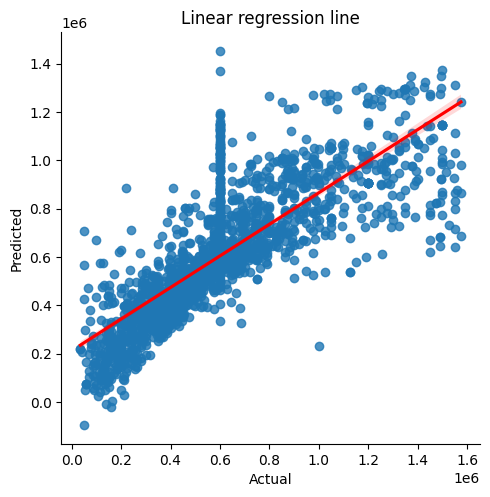

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

results_df = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})

print(results_df.head(10))
sns.lmplot(x='Actual', y='Predicted', data=results_df, line_kws={'color': 'red'})
plt.title('Linear regression line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 61012580704.25889
R^2 Score: 0.47370415721378567
      Actual  Predicted
1236     inf        inf
2728     inf        inf
7428     inf        inf
3941     inf        inf
5564     inf        inf
552      inf        inf
5225     inf        inf
4148     inf        inf
6920     inf        inf
1249     inf        inf


c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\farat\AppData\Local\Temp\ipykernel_21812\872825979.py:14: RuntimeWarning: overflow encountered in expm1
  y_pred_originalDT = np.expm1(y_pred_dt)
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:145: RuntimeWarning: invalid value encountered in subtract
  delta = np.subtract(stop, start, dtype=type(dt))
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


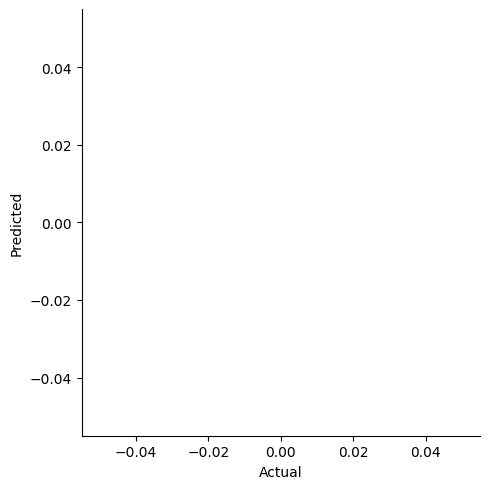

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(max_depth=5) 
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

DTmse = mean_squared_error(y_test, y_pred_dt)
DTr2 = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error: {DTmse}")
print(f"R^2 Score: {DTr2}")

y_test_originalDT = np.expm1(y_test)
y_pred_originalDT = np.expm1(y_pred_dt)

results_df_dt = pd.DataFrame({'Actual': y_test_originalDT, 'Predicted': y_pred_originalDT})
print(results_df.head(10))
sns.lmplot(x='Actual', y='Predicted', data=results_df_dt, line_kws={'color': 'red'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 56840338189.71652
R^2 Score: 0.5096940115217559
      Actual  Predicted
1236     inf        inf
2728     inf        inf
7428     inf        inf
3941     inf        inf
5564     inf        inf
552      inf        inf
5225     inf        inf
4148     inf        inf
6920     inf        inf
1249     inf        inf


c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\farat\AppData\Local\Temp\ipykernel_21812\499534103.py:14: RuntimeWarning: overflow encountered in expm1
  y_pred_originalRF = np.expm1(y_pred_rf)
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:145: RuntimeWarning: invalid value encountered in subtract
  delta = np.subtract(stop, start, dtype=type(dt))
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


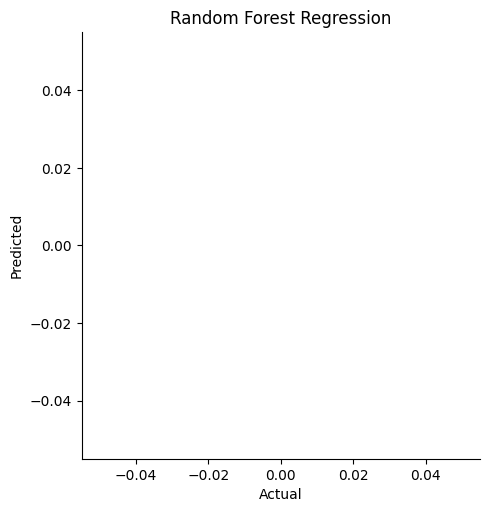

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42) 
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

RFmse = mean_squared_error(y_test, y_pred_rf)
RFr2 = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error: {RFmse}")
print(f"R^2 Score: {RFr2}")

y_test_originalRF = np.expm1(y_test)
y_pred_originalRF = np.expm1(y_pred_rf)

results_df_rf = pd.DataFrame({'Actual': y_test_originalRF, 'Predicted': y_pred_originalRF})
print(results_df_rf.head(10))

sns.lmplot(x='Actual', y='Predicted', data=results_df_rf, line_kws={'color': 'red'})
plt.title('Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 33810041248.8526
R^2 Score: 0.7083538518071657
      Actual  Predicted
1236     inf        inf
2728     inf        inf
7428     inf        inf
3941     inf        inf
5564     inf        inf
552      inf        inf
5225     inf        inf
4148     inf        inf
6920     inf        inf
1249     inf        inf


c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\farat\AppData\Local\Temp\ipykernel_21812\3778507743.py:14: RuntimeWarning: overflow encountered in expm1
  y_pred_originalGB = np.expm1(y_pred_gb)
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:145: RuntimeWarning: invalid value encountered in subtract
  delta = np.subtract(stop, start, dtype=type(dt))
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


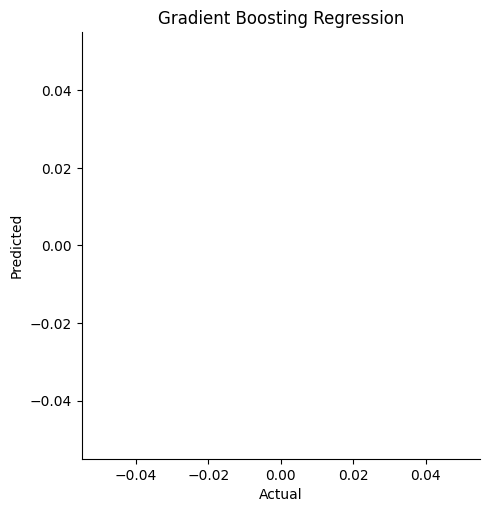

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

GBmse = mean_squared_error(y_test, y_pred_gb)
GBr2 = r2_score(y_test, y_pred_gb)
print(f"Mean Squared Error: {GBmse}")
print(f"R^2 Score: {GBr2}")

y_test_originalGB = np.expm1(y_test)
y_pred_originalGB = np.expm1(y_pred_gb)

results_df_gb = pd.DataFrame({'Actual': y_test_originalGB, 'Predicted': y_pred_originalGB})
print(results_df_gb.head(10))

sns.lmplot(x='Actual', y='Predicted', data=results_df_gb, line_kws={'color': 'red'})
plt.title('Gradient Boosting Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 33604975927.82259
R^2 Score: 0.7101227497084175
      Actual  Predicted
1236     inf        inf
2728     inf        inf
7428     inf        inf
3941     inf        inf
5564     inf        inf
552      inf        inf
5225     inf        inf
4148     inf        inf
6920     inf        inf
1249     inf        inf


c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\farat\AppData\Local\Temp\ipykernel_21812\2298082546.py:14: RuntimeWarning: overflow encountered in expm1
  y_pred_originalXGB = np.expm1(y_pred_xgb)
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:145: RuntimeWarning: invalid value encountered in subtract
  delta = np.subtract(stop, start, dtype=type(dt))
c:\Users\farat\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


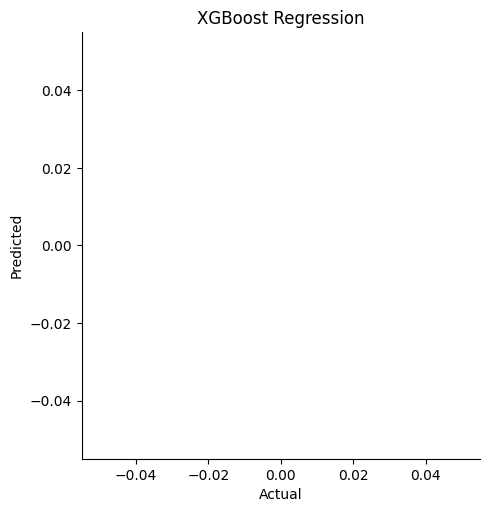

In [68]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

XGBmse = mean_squared_error(y_test, y_pred_xgb)
XGBr2 = r2_score(y_test, y_pred_xgb)
print(f"Mean Squared Error: {XGBmse}")
print(f"R^2 Score: {XGBr2}")

y_test_originalXGB = np.expm1(y_test)
y_pred_originalXGB = np.expm1(y_pred_xgb)

results_df_xgb = pd.DataFrame({'Actual': y_test_originalXGB, 'Predicted': y_pred_originalXGB})
print(results_df_xgb.head(10))

sns.lmplot(x='Actual', y='Predicted', data=results_df_xgb, line_kws={'color': 'red'})
plt.title('XGBoost Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()